# SCM Sales Analysis

## 1. Import library

In [84]:
import cufflinks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# pip install cufflinks

In [209]:
import plotly 
import plotly.express as px
from plotly import __version__ 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.go_offline()

init_notebook_mode(connected=True)

In [3]:
plotly.__version__

'5.24.1'

In [4]:
cf.__version__

'0.17.3'

In [5]:
pd.__version__

'2.3.3'

In [6]:
np.__version__

'1.26.4'

In [ ]:
# pip install numpy==1.26.4

In [ ]:
# pip install pandas==2.1.0

In [ ]:
# pip install plotly==5.24.1

### Load Dataset

In [86]:
data = './dataset/DataCo_SCM_Data.csv'

df = pd.read_csv(data, encoding='latin1')
df.head(5)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


## 2. Exploratory Analysis 

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Days for shipping (real),180519.0,3.497654,1.623722,0.00000,2.000000,3.000000,5.000000,6.000000
Days for shipment (scheduled),180519.0,2.931847,1.374449,0.00000,2.000000,4.000000,4.000000,4.000000
Benefit per order,180519.0,21.974989,104.433526,-4274.97998,7.000000,31.520000,64.800003,911.799988
Sales per customer,180519.0,183.107609,120.043670,7.49000,104.379997,163.990005,247.399994,1939.989990
Late_delivery_risk,180519.0,0.548291,0.497664,0.00000,0.000000,1.000000,1.000000,1.000000
Category Id,180519.0,31.851451,15.640064,2.00000,18.000000,29.000000,45.000000,76.000000
Customer Id,180519.0,6691.379495,4162.918106,1.00000,3258.500000,6457.000000,9779.000000,20757.000000
Customer Zipcode,180516.0,35921.126914,37542.461122,603.00000,725.000000,19380.000000,78207.000000,99205.000000
Department Id,180519.0,5.443460,1.629246,2.00000,4.000000,5.000000,7.000000,12.000000
Order Customer Id,180519.0,6691.379495,4162.918106,1.00000,3258.500000,6457.000000,9779.000000,20757.000000


In [9]:
df.describe(include='object')

,Type,Delivery Status,Category Name,Customer City,Customer Country,Customer Fname,Customer Lname,Customer Segment,Customer State,Customer Street,...,Order City,Order Country,order date (DateOrders),Order Region,Order State,Order Status,Product Image,Product Name,shipping date (DateOrders),Shipping Mode
count,180519,180519,180519,180519,180519,180519,180511,180519,180519,180519,...,180519,180519,180519,180519,180519,180519,180519,180519,180519,180519
unique,4,4,50,563,2,782,1109,3,46,7458,...,3597,164,65752,23,1089,9,118,118,63701,4
top,DEBIT,Late delivery,Cleats,Caguas,EE. UU.,Mary,Smith,Consumer,PR,9126 Wishing Expressway,...,Santo Domingo,Estados Unidos,12/14/2016 12:29,Central America,Inglaterra,COMPLETE,http://images.acmesports.sports/Perfect+Fitnes...,Perfect Fitness Perfect Rip Deck,1/5/2016 5:58,Standard Class
freq,69295,98977,24551,66770,111146,65150,64104,93504,69373,122,...,2211,24840,5,28341,6722,59491,24515,24515,10,107752


In [10]:
df.shape

(180519, 49)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Fname                 180519 non-null  object 
 12  Customer Id                   

In [12]:
df.nunique()

Type                                  4
Days for shipping (real)              7
Days for shipment (scheduled)         4
Benefit per order                 21998
Sales per customer                 2927
Delivery Status                       4
Late_delivery_risk                    2
Category Id                          51
Category Name                        50
Customer City                       563
Customer Country                      2
Customer Fname                      782
Customer Id                       20652
Customer Lname                     1109
Customer Segment                      3
Customer State                       46
Customer Street                    7458
Customer Zipcode                    995
Department Id                        11
Department Name                      11
Market                                5
Order City                         3597
Order Country                       164
Order Customer Id                 20652
order date (DateOrders)           65752


In [13]:
df['Type'].value_counts()

Type
DEBIT       69295
TRANSFER    49883
PAYMENT     41725
CASH        19616
Name: count, dtype: int64

In [14]:
df['Delivery Status'].value_counts()

Delivery Status
Late delivery        98977
Advance shipping     41592
Shipping on time     32196
Shipping canceled     7754
Name: count, dtype: int64

### Data Cleaning

In [15]:
# Missing data 
df.isna().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Market                                0
Order City                            0
Order Country                         0
Order Customer Id                     0
order date (DateOrders)               0


In [16]:
# Duplicated rows 
df.duplicated().sum()

0

In [17]:
int(df.duplicated().sum())

0

### Order Date to Datetime

In [87]:
import datetime as dt

In [88]:
df['order date (DateOrders)'] = df['order date (DateOrders)'].apply(pd.to_datetime)

In [89]:
df['Order_Month'] = df['order date (DateOrders)'].dt.month

In [90]:
df['Order_Month_Name'] = df['order date (DateOrders)'].dt.month_name()

In [91]:
df['Order_Year'] = df['order date (DateOrders)'].dt.year

### Shipping date

In [92]:
df['shipping date (DateOrders)'] = df['shipping date (DateOrders)'].apply(pd.to_datetime)

In [93]:
df['Shipping_Month'] = df['shipping date (DateOrders)'].dt.month

In [94]:
df['Shipping_Year'] = df['shipping date (DateOrders)'].dt.year

In [95]:
df.head(5)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Order_Month,Order_Month_Name,Order_Year,Shipping_Month,Shipping_Year
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,Smart watch,327.75,0,2018-02-03 22:56:00,Standard Class,1,January,2018,2,2018
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,Smart watch,327.75,0,2018-01-18 12:27:00,Standard Class,1,January,2018,1,2018
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,Smart watch,327.75,0,2018-01-17 12:06:00,Standard Class,1,January,2018,1,2018
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,Smart watch,327.75,0,2018-01-16 11:45:00,Standard Class,1,January,2018,1,2018
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,Smart watch,327.75,0,2018-01-15 11:24:00,Standard Class,1,January,2018,1,2018


## 3. Sales Analysis

In [126]:
class SalesAnalyzer: 

    def __init__(self, df: pd.DataFrame):
        self._df = df.copy()
        self._validate_data()

    def _validate_data(self):
        required_cols = ['Order_Year', 'Order_Month', 'Order_Month_Name', 'Sales', 'Market'] 

        # Check if columns exsit
        if not all(col in self._df.columns for col in required_cols):
            missing = [col for col in required_cols if col not in self._df.columns]
            raise ValueError(f"DataFrame is missing required columns: {missing}")

    # Analysis 

    def get_sales_by_year(self) -> pd.DataFrame:
        year_analysis = self._df.groupby('Order_Year').agg(
            Total_Sales=('Sales', 'sum'),
            Total_Profit=('Order Profit Per Order', 'sum'),
            Average_Sales_Per_Order=('Sales', 'mean')
        ).reset_index()
        return year_analysis 

    def get_sales_by_month(self) -> pd.DataFrame:
        month_analysis = self._df.groupby(['Order_Year', 'Order_Month', 'Order_Month_Name']).agg(
            Total_Sales=('Sales', 'sum'),
            Total_Profit=('Order Profit Per Order', 'sum')
        ).reset_index()

        month_analysis = month_analysis.sort_values(by=['Order_Year', 'Order_Month'])
        return month_analysis

    def get_market_performance(self) -> pd.DataFrame:
        """Calculates performance metrics grouped by Market."""
        market_analysis = self._df.groupby('Market').agg(
            Total_Sales=('Sales', 'sum'),
            Average_Profit_Ratio=('Order Item Profit Ratio', 'mean'),
            Order_Count=('Order Id', 'nunique')
        ).reset_index()
        
        # Sort markets by total sales for easy comparison
        market_analysis = market_analysis.sort_values(by='Total_Sales', ascending=False)
        return market_analysis

    def get_top_performing_market_month(self, top_n: int = 5) -> pd.DataFrame:
        """Finds the top N market-month combinations based on total Sales."""
        
        # Group by all three dimensions: Market, Year, and Month
        grouped_sales = self._df.groupby(['Market', 'Order_Year', 'Order_Month'])['Sales'].sum().reset_index()
        grouped_sales.rename(columns={'Sales': 'Total_Sales'}, inplace=True)
        
        # Find the top N entries
        top_analysis = grouped_sales.nlargest(top_n, 'Total_Sales')
        return top_analysis.reset_index(drop=True)
    

### Yearly Sales

In [62]:
sales_analyzer = SalesAnalyzer(df)

annual_sales = sales_analyzer.get_sales_by_year()
print("--- Annual Sales Summary ---")
print(annual_sales)

--- Annual Sales Summary ---
   Order_Year   Total_Sales  Total_Profit  Average_Sales_Per_Order
0        2015  1.234083e+07  1.318857e+06               196.980550
1        2016  1.230382e+07  1.310119e+06               196.703714
2        2017  1.180844e+07  1.304085e+06               221.979776
3        2018  3.316501e+05  3.384189e+04               156.217671


### Monthly Sales

In [63]:
monthly_sales = sales_analyzer.get_sales_by_month()
print("---Monthly Sales Summary---")
print(month

---Monthly Sales Summary---
    Order_Year  Order_Month Order_Month_Name   Total_Sales   Total_Profit
0         2015            1          January  1.051590e+06  111660.740132
1         2015            2         February  9.270099e+05   99140.660196
2         2015            3            March  1.051254e+06  113778.210191
3         2015            4            April  1.014463e+06  108083.679957
4         2015            5              May  1.050478e+06  112147.900143
5         2015            6             June  1.024006e+06  110147.160313
6         2015            7             July  1.038081e+06  115624.059879
7         2015            8           August  1.029495e+06  117979.770302
8         2015            9        September  1.018339e+06  113467.940118
9         2015           10          October  1.049154e+06  101757.870040
10        2015           11         November  1.029120e+06  104427.360120
11        2015           12         December  1.057841e+06  110641.549881
12        

### Market Sales

In [64]:
market_summary = sales_analyzer.get_market_performance()
print("---Market and Sales performance---")
print(market_summary)

---Market and Sales performance---
         Market   Total_Sales  Average_Profit_Ratio  Order_Count
1        Europe  1.087240e+07              0.122390        18561
2         LATAM  1.027761e+07              0.121208        17181
3  Pacific Asia  8.273744e+06              0.115863        17577
4          USCA  5.066529e+06              0.121832         8579
0        Africa  2.294453e+06              0.124975         3854


### Best Sales Market and Datetime

In [65]:
top_market_months = sales_analyzer.get_top_performing_market_month(top_n=3)
print("---Top 3 Market/Month Sales---")
print(top_market_months)

---Top 3 Market/Month Sales---
   Market  Order_Year  Order_Month   Total_Sales
0  Europe        2017            9  1.143775e+06
1  Europe        2017            8  1.109337e+06
2   LATAM        2017            5  1.105485e+06


### Sales Plots 

In [111]:
# yearly sales plot

sales_by_year = df.groupby('Order_Year')['Sales'].sum().reset_index()

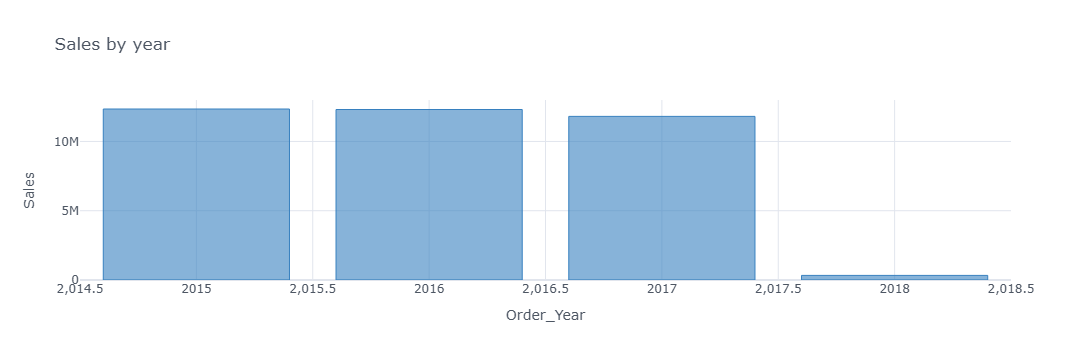

In [113]:
sales_by_year.iplot(kind ='bar', x = 'Order_Year', y = 'Sales',title='Sales by year',xTitle='Order_Year',yTitle='Sales', theme ='white', colors ='blue')

In [103]:
# Monthly Sales plot

sales_by_month = df.groupby('Order_Month_Name')['Sales'].sum().reset_index()


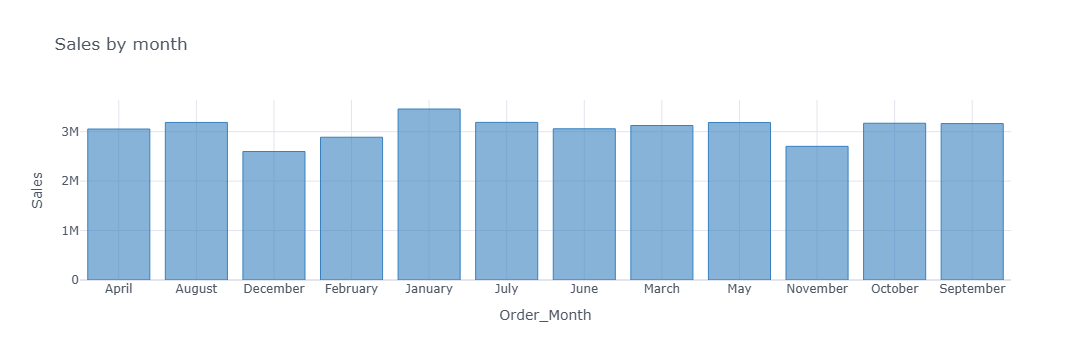

In [105]:
sales_by_month.iplot(kind ='bar', x = 'Order_Month_Name', y = 'Sales',title='Sales by month',xTitle='Order_Month',yTitle='Sales', theme ='white', colors ='blue')

In [109]:
# Market sales plot 

sales_by_market = df.groupby('Market')['Sales'].sum().reset_index()

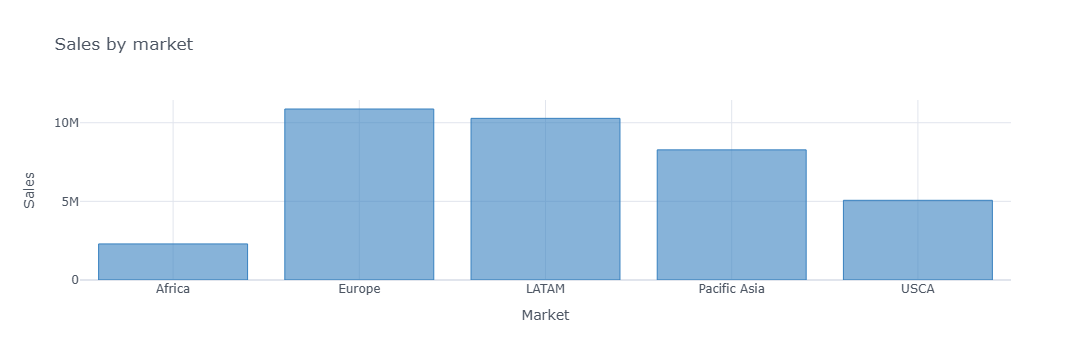

In [110]:
sales_by_market.iplot(kind ='bar', x = 'Market', y = 'Sales',title='Sales by market',xTitle='Market',yTitle='Sales', theme ='white', colors ='blue')

## 4. Profit Analysis

In [160]:
class ProfitAnalyzer(SalesAnalyzer):

    # inheriting all from SalesAnalyzer

    def __init__(self, df: pd.DataFrame):
        # parent class
        super().__init__(df)

    def analyze_profit_margin_by_market(self) -> pd.DataFrame:
       
        
        analysis = self._df.groupby('Market').agg(
            Average_Profit_Ratio=('Order Item Profit Ratio', 'mean'),
            Total_Profit=('Order Profit Per Order', 'sum'),
            Order_Count=('Order Id', 'nunique')
        ).reset_index()
        
        # Sort to easily identify high-margin markets
        analysis = analysis.sort_values(by='Average_Profit_Ratio', ascending=False)
        return analysis

    def identify_low_profit_orders(self, profit_ratio_threshold: float=0.05) -> pd.DataFrame:

        # Filter based on the threshold
        low_profit_orders = self._df[
            self._df['Order Item Profit Ratio'] < profit_ratio_threshold
            ]

        # return relevant columns
        return low_profit_orders[[
            'Order Id', 'Category Name', 'Product Name', 'Order Item Profit Ratio', 'Order Item Total', 'Order Profit Per Order'
        ]]


#### Total Profit

In [162]:
profit_analyzer = ProfitAnalyzer(df)

In [163]:
# market profit
market_profit = profit_analyzer.analyze_profit_margin_by_market()
print("--- Profit Margin Analyziz ---")
print(market_profit)

--- Profit Margin Analyziz ---
         Market  Average_Profit_Ratio  Total_Profit  Order_Count
0        Africa              0.124975  2.520712e+05         3854
1        Europe              0.122390  1.169443e+06        18561
4          USCA              0.121832  5.643138e+05         8579
2         LATAM              0.121208  1.123322e+06        17181
3  Pacific Asia              0.115863  8.577534e+05        17577


In [143]:
# total profit flot
profit_by_market = df.groupby('Market')['Order Profit Per Order'].sum().reset_index()

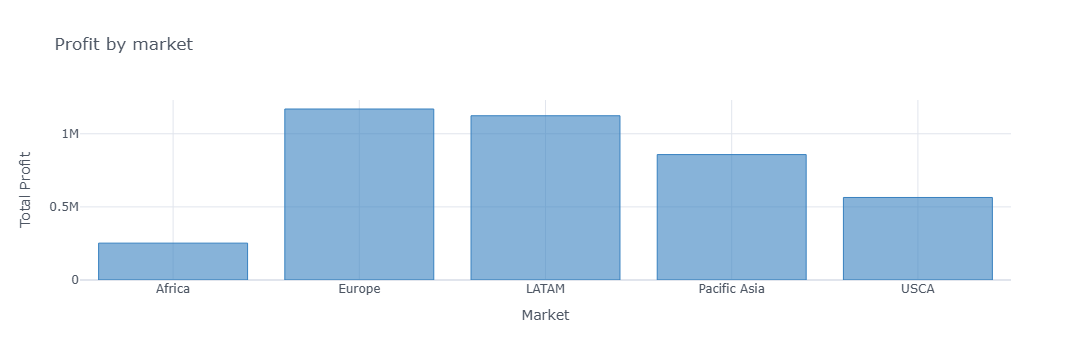

In [144]:
profit_by_market.iplot(kind ='bar', x = 'Market', y = 'Order Profit Per Order',title='Profit by market',xTitle='Market',yTitle='Total Profit', theme ='white', colors ='blue')

#### Low Profit Items

In [164]:
low_profit_items = profit_analyzer.identify_low_profit_orders(profit_ratio_threshold=0.1)
print("---Orders below 10% profit ratio---")
low_profit_items

---Orders below 10% profit ratio---


,Order Id,Category Name,Product Name,Order Item Profit Ratio,Order Item Total,Order Profit Per Order
1,75939,Sporting Goods,Smart watch,-0.80,311.359985,-249.089996
2,75938,Sporting Goods,Smart watch,-0.80,309.720001,-247.779999
3,75937,Sporting Goods,Smart watch,0.08,304.809998,22.860001
5,75935,Sporting Goods,Smart watch,0.06,294.980011,18.580000
12,75928,Sporting Goods,Smart watch,0.08,262.200012,21.760000
...,...,...,...,...,...,...
180502,26076,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,0.06,377.980011,23.809999
180504,26072,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,0.09,363.980011,32.029999
180506,26064,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,-0.19,351.980011,-65.470001
180509,26052,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,0.00,335.980011,0.000000


In [159]:
# Low Profit by product category
profit_by_category = df.groupby('Category Name')['Order Profit Per Order'].sum().reset_index()

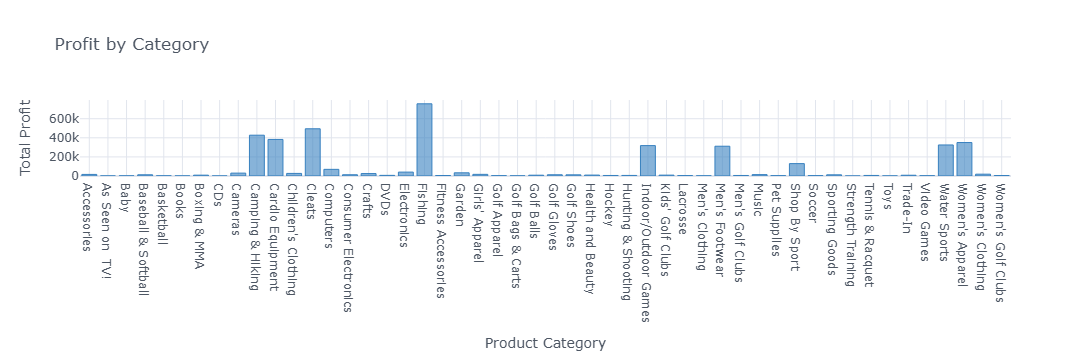

In [158]:
profit_by_category.iplot(kind ='bar', x = 'Category Name', y = 'Order Profit Per Order',title='Profit by Category',xTitle='Product Category', yTitle='Total Profit', theme ='white', colors ='blue')

## 5. Discount Analysis

In [181]:
class DiscountAnalyzer(ProfitAnalyzer):

    def __init__(self, df: pd.DataFrame):
        super().__init__(df)

    def group_discounts_by_bin(self, bins: list = [0, 0.05, 0.10, 0.15, 0.20]) -> pd.DataFrame:

        print("---Grouping Discounts into Bins---")

        self._df['Discount_Segment'] = pd.cut(
          self._df['Order Item Discount Rate'],
          bins=bins,
          include_lowest=True,
          right=False,
          labels=[f'{b*100}% to {bins[i+1]*100}%' for i, b in enumerate(bins[:-1])]
        )

        # aggregate sales and profits by discount segment
        analysis = self._df.groupby('Discount_Segment').agg(
          Order_Count=('Order Id', 'nunique'),
            Total_Sales=('Sales', 'sum'),
            Total_Profit=('Order Profit Per Order', 'sum'),
            Average_Profit_Ratio=('Order Item Profit Ratio', 'mean'),
            Average_Discount=('Order Item Discount Rate', 'mean')
        ).reset_index()

        analysis = analysis.dropna(subset=['Discount_Segment'])

        return analysis 

    def discount_by_product_category(self) -> pd.DataFrame:
        
        analysis = self._df.groupby('Category Name').agg(
            Average_Discount_Rate=('Order Item Discount Rate', 'mean'),
            Average_Sales_Per_Order=('Sales', 'mean'),
            Average_Profit_Per_Order=('Order Profit Per Order', 'mean'),
            Total_Quantity_Sold=('Order Item Quantity', 'sum')
        ).reset_index()

        # Identify products with high sales but low profit margins despite low discounts
        analysis['Discount_Effectiveness'] = analysis['Average_Profit_Per_Order'] / (analysis['Average_Discount_Rate'] + 0.001)
        
        # Sort to easily see which categories are the most or least effective at generating profit given the discount
        analysis = analysis.sort_values(by='Discount_Effectiveness', ascending=False)
        return analysis
        

#### Sales and Profit based on Discount Segment

In [182]:
discount_analyzer = DiscountAnalyzer(df)

In [176]:
# sales and profits based on discount bins 

discount_bins_results = discount_analyzer.group_discounts_by_bin(
    bins=[0, 0.02, 0.05, 0.10, 0.15, 0.20, 0.25]
)

print("--- Discount Performance By Discount Segment ---")
discount_bins_results

---Grouping Discounts into Bins---
--- Discount Performance By Discount Segment ---


C:\Users\Hyeon\AppData\Local\Temp\ipykernel_12012\2194653351.py:19: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Discount_Segment,Order_Count,Total_Sales,Total_Profit,Average_Profit_Ratio,Average_Discount
0,0% to 2.0%,17045,4.085162e+06,506066.363404,0.124469,0.005000
1,2.0% to 5.0%,23879,6.129540e+06,694559.891466,0.119015,0.030000
2,5.0% to 10.0%,29592,8.173765e+06,943058.541596,0.124452,0.067500
3,10.0% to 15.0%,23689,6.131173e+06,646082.469403,0.118924,0.116667
4,15.0% to 20.0%,29622,8.176531e+06,807926.249038,0.117908,0.165000
5,20.0% to 25.0%,9407,2.044242e+06,177312.739440,0.112289,0.200000


### Discount and Product Category

In [183]:
category_discount_results = discount_analyzer.discount_by_product_category()
print("--- Discount Analysis by Product ---")
category_discount_results 

--- Discount Analysis by Product ---


,Category Name,Average_Discount_Rate,Average_Sales_Per_Order,Average_Profit_Per_Order,Total_Quantity_Sold,Discount_Effectiveness
13,Computers,0.102240,1500.000000,157.594593,442,1526.490398
20,Garden,0.101157,532.580017,69.097128,484,676.381562
15,Crafts,0.101694,461.480011,52.750351,484,513.664291
8,Cameras,0.101588,452.040008,51.165203,592,498.745304
18,Fishing,0.101681,399.980011,43.649106,17325,425.092688
11,Children's Clothing,0.101472,357.100006,41.684202,652,406.784701
40,Sporting Goods,0.102353,327.750000,35.066135,357,339.285309
36,Music,0.101359,260.649994,33.263410,434,324.966681
23,Golf Bags & Carts,0.093443,169.990005,29.673279,61,314.193714
9,Camping & Hiking,0.101681,299.980011,31.135230,13729,303.222556


### Visual plots for discount sales and profit

In [228]:
def plot_creator(
    df_analysis: pd.DataFrame,
    title: str = "Sales and Profit by Discount Segment"
): 

    # Setup the plot environment
    sns.set_style("whitegrid")
    fig, ax1 = plt.subplots(figsize=(16, 8))

    # Plot Total Sales (Primary Axis)
    sales_color = 'tab:blue'
    sns.barplot(
        x='Discount_Segment', 
        y='Total_Sales', 
        data=df_analysis, 
        ax=ax1, 
        color=sales_color, 
        alpha=0.7,
        label='Total Sales'
    )
    ax1.set_xlabel("Discount Segment")
    ax1.set_ylabel("Total Sales (USD)", color=sales_color)
    ax1.tick_params(axis='y', labelcolor=sales_color)
    
    # Rotate x-labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Create Total Profit (Secondary Axis)
    ax2 = ax1.twinx()  # Instantiate a second y-axis that shares the same x-axis
    profit_color = 'tab:red'
    
    # Plot Total Profit as a line on the secondary axis
    ax2.plot(
        df_analysis['Discount_Segment'], 
        df_analysis['Total_Profit'], 
        color=profit_color, 
        marker='o', 
        linewidth=2,
        label='Total Profit'
    )
    ax2.set_ylabel("Total Profit (USD)", color=profit_color)
    ax2.tick_params(axis='y', labelcolor=profit_color)

    fig.suptitle(title, fontsize=16)
    fig.tight_layout(rect=[0, 0, 1, 0.96]) 

    plt.show()

In [229]:
# dataset 
discount_results_df = discount_analyzer.group_discounts_by_bin()

---Grouping Discounts into Bins---


C:\Users\Hyeon\AppData\Local\Temp\ipykernel_12012\632078450.py:19: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



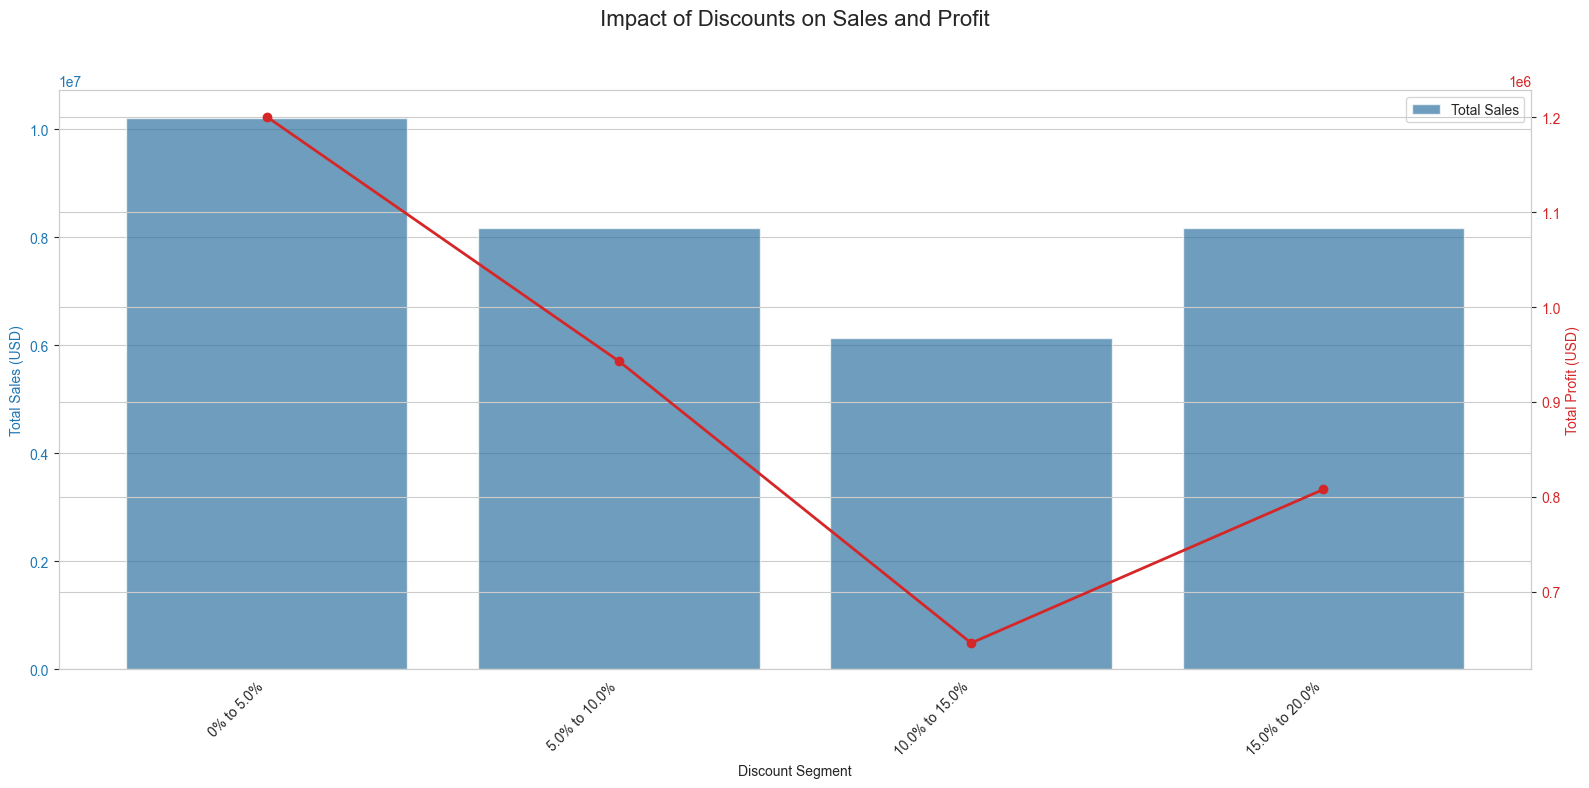

In [230]:
# visualization
plot_creator(df_analysis=discount_results_df, title="Impact of Discounts on Sales and Profit",)